
Nama : Lukas
NIM : 1103204195
Dataset : Salary_Data_Simple_SVR.csv



In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:

# Memuat data menggunakan pandas
data = pd.read_csv("/content/drive/MyDrive/Dataset_ML/Salary_Data_Simple_SVR.csv")

# Menampilkan data
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
# Preparation of data
X = data.iloc[:, :-1].values #fitur
y = data.iloc[:, -1].values #target

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# baris data x/y ada yg dijadikan untuk training/ dijadikan testing
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the Model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 49830096.85590839


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Coefficient of Determination (R-squared)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-squared):", r2)

Root Mean Squared Error (RMSE): 7059.04362190151
Mean Absolute Error (MAE): 6286.453830757749
Mean Absolute Percentage Error (MAPE): 7.744880046205216
Coefficient of Determination (R-squared): 0.9024461774180497


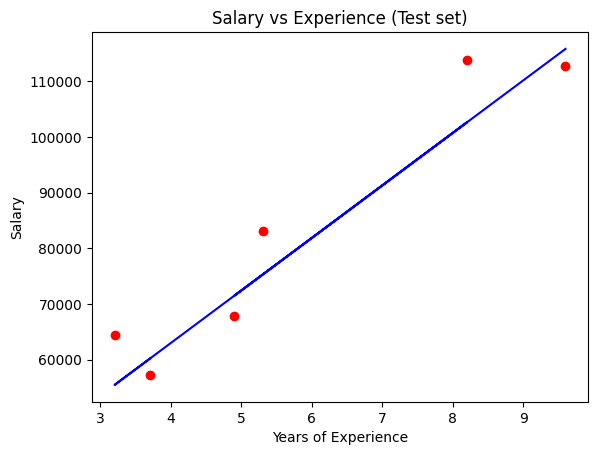

In [ ]:
# Visualizing the Test set results
plt.scatter(X_test, y_test, color='red')
# plt.plot(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), color='blue') # We still use X_train as we want to see how our model is predicting the Test set results
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

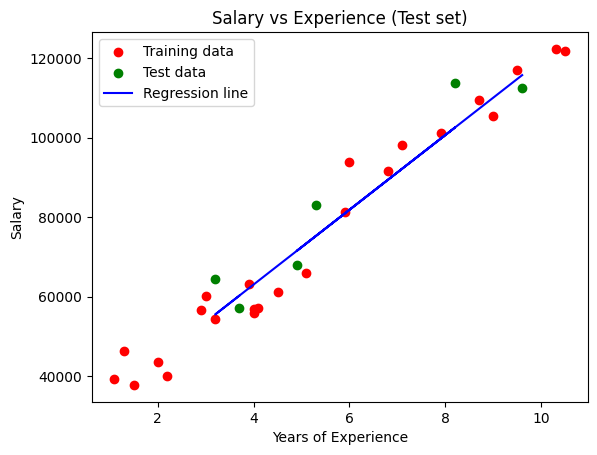

In [ ]:
# Visualizing the Training set results
plt.scatter(X_train, y_train, color='red', label='Training data')
# plt.plot(X_train, regressor.predict(X_train), color='blue', label='Regression line')
# plt.title('Salary vs Experience (Training set)')
# plt.xlabel('Years of Experience')
# plt.ylabel('Salary')
# plt.legend()
# plt.show()

# Visualizing the Test set results
plt.scatter(X_test, y_test, color='green', label='Test data')
# plt.plot(X_train, regressor.predict(X_train), color='blue', label='Regression line')
# plt.title('Salary vs Experience (Test set)')
# plt.xlabel('Years of Experience')
# plt.ylabel('Salary')
# plt.legend()
# plt.show()

plt.plot(X_test, y_pred, color='blue', label='Regression line')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
# df_comparison = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df_test = pd.DataFrame({'YearExperience': X_test.flatten(), 'Actual_Salary': y_test, 'Predicted_Salary': y_pred})

df_test

,YearExperience,Actual_Salary,Predicted_Salary
0,9.6,112635.0,115790.210113
1,4.9,67938.0,71498.278095
2,8.2,113812.0,102596.868661
3,5.3,83088.0,75267.804224
4,3.2,64445.0,55477.792045
5,3.7,57189.0,60189.699707


In [ ]:
# Input data baru
new_data = np.array([[10]])

# Lakukan prediksi menggunakan model yang sudah dilatih
predicted_salary = regressor.predict(new_data)

# Tampilkan hasil prediksi
print("Prediksi gaji untuk {} tahun pengalaman adalah: ${:,.2f}".format(new_data, predicted_salary[0]))


Prediksi gaji untuk [[10]] tahun pengalaman adalah: $119,559.74
